In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 
              'id':str, 'sqft_lot':int, 'view':int}

In [3]:
df_sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
df_sales = df_sales.sort_values(by=['sqft_living', 'price'])

df_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [4]:
def polynomial_dataframe(feature, degree): 
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature

    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = np.apply_along_axis(lambda x: x**power, 0, feature)
            
    return poly_dataframe

In [5]:
l2_small_penalty = 1.5e-5

In [6]:
poly15 = polynomial_dataframe(df_sales['sqft_living'], 15)

In [7]:
from sklearn import linear_model

model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15, df_sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

<hr>

**Quiz Question: What’s the learned value for the coefficient of feature power_1?**

In [8]:
model.coef_

array([ 1.24873306e+02, -4.77376011e-02,  3.01446238e-05, -2.44419942e-09,
       -1.94153675e-13,  8.54085686e-18,  1.51142121e-21,  8.27979094e-26,
        6.52603100e-31, -3.27895017e-34, -3.87962315e-38, -2.72437650e-42,
       -1.07790800e-46,  3.78242694e-51,  1.39790296e-54])

<hr>

In [9]:
df_set1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict) 
df_set2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict) 
df_set3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict) 
df_set4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict) 

In [10]:
l2_small_penalty = 1e-9

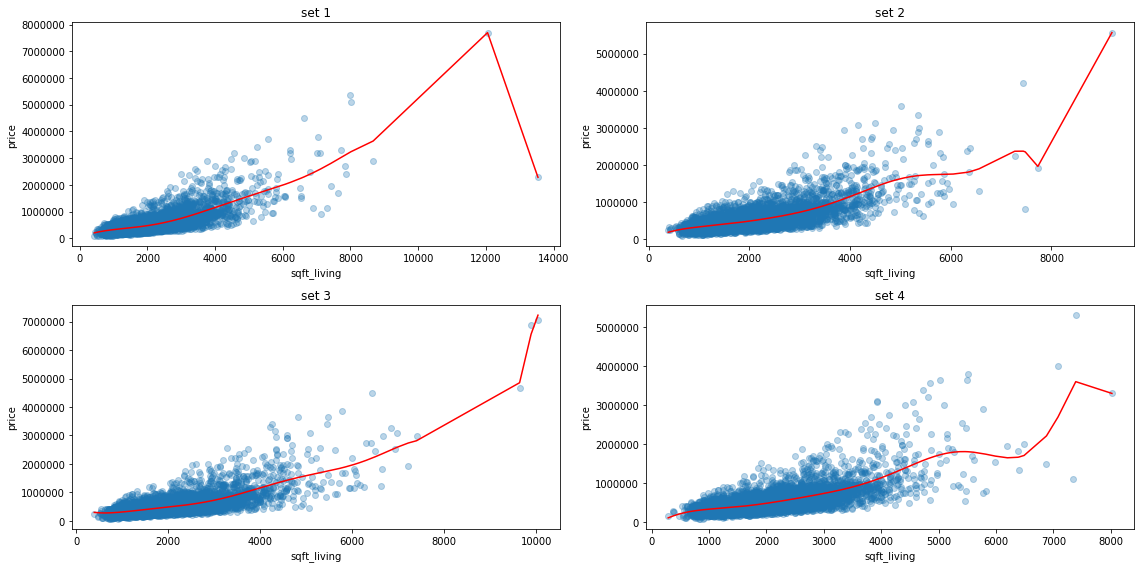

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,23888.822772,544.669407,-0.355448,0.000122,-1.171753e-08,-3.905123e-13,-1.390765e-17,1.478603e-20,6.874916e-25,-7.572039e-29,-1.040973e-32,-3.718438e-37,3.399893e-41,5.565919e-45,2.537613e-49,-3.351529e-53
1,-55614.635840,859.362624,-0.818118,0.000429,-9.127704e-08,-2.696050e-12,3.739804e-15,-1.427119e-19,-6.307948e-23,-1.445596e-27,7.443213e-31,9.258662e-35,3.279820e-41,-1.295435e-42,-1.387812e-46,1.665464e-50
2,470987.828429,-755.395817,0.975579,-0.000459,7.779578e-08,7.150137e-12,-2.886020e-15,-2.136787e-20,3.380852e-23,2.191782e-27,-1.970678e-31,-4.159931e-35,-1.801963e-39,3.190712e-43,5.084570e-47,-3.933043e-51
3,-145655.633685,1119.445767,-0.983760,0.000339,3.603770e-08,-4.378140e-11,5.771917e-15,7.667952e-19,-9.492977e-23,-1.960308e-26,-2.108784e-32,3.310050e-34,3.477339e-38,-2.430393e-42,-8.795533e-46,6.445697e-50


In [11]:
coefs = {}
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16,8))

for i, setN in enumerate([df_set1, df_set2, df_set3, df_set4]):
    polyN = polynomial_dataframe(setN['sqft_living'], 15)

    modelN = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
    modelN.fit(polyN, setN['price'])
    
    coefs[i] = [modelN.intercept_] + modelN.coef_.tolist()
    
    ax = axes[i//2, i%2]
    
    ax.scatter(x=setN['sqft_living'], y=setN['price'], alpha=0.3)
    ax.plot(setN['sqft_living'], modelN.predict(polyN), color='red')
    ax.set_ylabel('price')
    ax.set_title('set {}'.format(i+1))
    ax.set_xlabel('sqft_living')
    
plt.tight_layout()
plt.show()

pd.DataFrame(coefs).T.head()

<hr>

**Quiz Question: For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?**

<hr>

In [12]:
l2_large_penalty=1.23e2

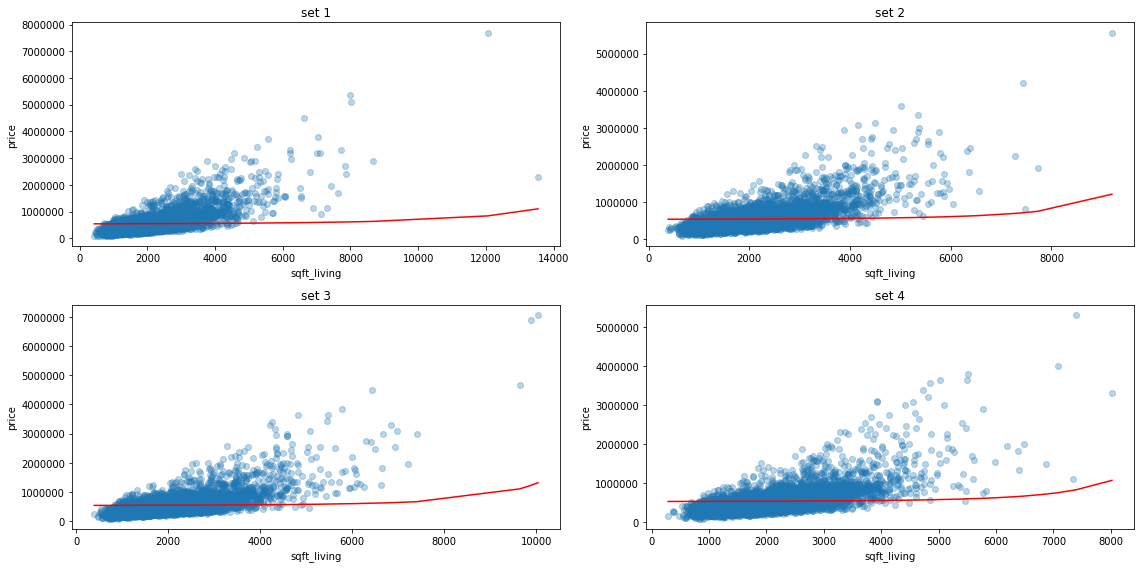

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,539103.031058,2.328068,0.000354,3.319697e-08,2.000825e-12,1.114926e-16,6.577861e-21,4.129395e-25,2.703938e-29,1.816148e-33,1.238243e-37,8.518725e-42,5.894556e-46,4.095426e-50,2.854649e-54,1.995475e-58
1,529853.025358,2.097569,0.000391,6.671899e-08,8.900030e-12,9.726399e-16,9.697337e-20,9.505645e-24,9.444910e-28,9.571913e-32,9.869452e-36,1.031011e-39,1.087298e-43,1.154537e-47,1.232113e-51,1.319867e-55
2,533640.114097,2.289063,0.000412,6.088353e-08,6.585722e-12,6.152782e-16,5.644466e-20,5.288344e-24,5.070914e-28,4.946573e-32,4.880438e-36,4.850091e-40,4.841615e-44,4.846350e-48,4.858836e-52,4.875585e-56
3,524562.969047,2.085962,0.000405,7.468646e-08,1.130966e-11,1.458644e-15,1.735613e-19,2.016096e-23,2.346053e-27,2.756361e-31,3.270431e-35,3.910469e-39,4.701180e-43,5.672123e-47,6.859581e-51,8.308436e-55


In [13]:
coefs = {}
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16,8))

for i, setN in enumerate([df_set1, df_set2, df_set3, df_set4]):
    polyN = polynomial_dataframe(setN['sqft_living'], 15)

    modelN = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
    modelN.fit(polyN, setN['price'])
    
    coefs[i] = [modelN.intercept_] + modelN.coef_.tolist()
    
    ax = axes[i//2, i%2]
    
    ax.scatter(x=setN['sqft_living'], y=setN['price'], alpha=0.3)
    ax.plot(setN['sqft_living'], modelN.predict(polyN), color='red')
    ax.set_ylabel('price')
    ax.set_title('set {}'.format(i+1))
    ax.set_xlabel('sqft_living')
    
plt.tight_layout()
plt.show()

pd.DataFrame(coefs).T.head()

<hr>

**Quiz Question: For the models learned with regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?**

<hr>

In [14]:
df_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
df_test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [15]:
n = len(df_shuffled)
k = 10

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print(i, (start, end))

0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)


In [16]:
def k_fold_cross_validation(k, l2_penalty, data, target):
    n = len(data)
    
    errors = []
    
    for i in range(k):
        start = (n*i)//k
        end = (n*(i+1))//k-1
        
        validation_set = data[start:end+1]
        validation_target = target[start:end+1]
        
        train_set = data[0:start].append(data[end+1:n])
        train_target = target[0:start].append(target[end+1:n])
        
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(train_set, train_target)
        
        validation_predict = model.predict(validation_set)
        error = validation_target - validation_predict
        
        errors.append(np.dot(error.T, error))
    
    return np.mean(errors)

In [17]:
l2_penaltys = np.logspace(3, 9, num=13)

In [18]:
avg_errors = {}

data = polynomial_dataframe(df_shuffled['sqft_living'], 15)
target = df_shuffled['price']

for l2p in l2_penaltys:
    avg_errors[l2p] = k_fold_cross_validation(10, l2p, data, target)
    
pd.DataFrame(avg_errors, index=['Average Validation Error']).T

,Average Validation Error
1.000000e+03,2.649774e+14
3.162278e+03,2.656929e+14
1.000000e+04,2.659244e+14
3.162278e+04,2.659981e+14
1.000000e+05,2.660214e+14
3.162278e+05,2.660288e+14
1.000000e+06,2.660312e+14
3.162278e+06,2.660319e+14
1.000000e+07,2.660321e+14
3.162278e+07,2.660322e+14


<hr>

**Quiz Question: What is the best value for the L2 penalty according to 10-fold validation?**

<hr>

**Quiz Question: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty?**

In [19]:
df_test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [20]:
model = linear_model.Ridge(alpha=1e3, normalize=True)
model.fit(poly15, df_sales['price'])

test_predicted = model.predict(polynomial_dataframe(df_test['sqft_living'], 15))

rss = np.dot((test_predicted-df_test['price']).T, (test_predicted-df_test['price']))

print('{:0.3}'.format(rss))

2.84e+14
